In [72]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from relaynet import RelayNet
from data_utils import get_imdb_data

#torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
train_data, test_data = get_imdb_data()
print("Train size: %i" % len(train_data))
print("Test size: %i" % len(test_data))

Train size: 88
Test size: 22


In [74]:
relay_net = RelayNet(dropout_prob=0)
relay_net.load_state_dict(torch.load('models/model-89.model'))
relay_net = relay_net.cuda()

/home/magnus/Documents/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


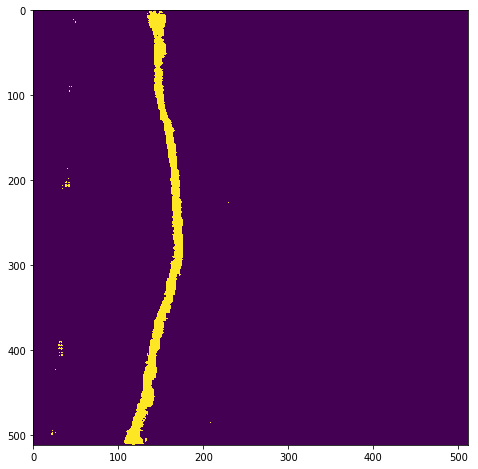

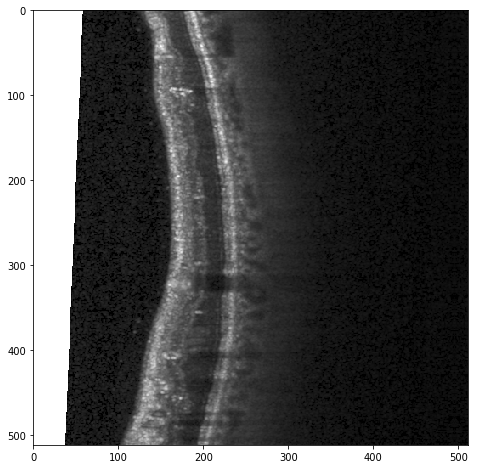

In [75]:
out = relay_net(Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True))
max_val, idx = torch.max(out,1)
idx = idx.data.cpu().numpy()
idx = np.squeeze(idx==2)
plt.imshow(idx)
plt.show()

img_test = test_data.X[11:12]
img_test = np.squeeze(img_test)
plt.imshow(img_test, cmap='gray')
plt.show()

In [76]:
relay_net = RelayNet(dropout_prob=0.3)
relay_net.load_state_dict(torch.load('models_dropout/model-89.model'))
relay_net = relay_net.cuda()

/home/magnus/Documents/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


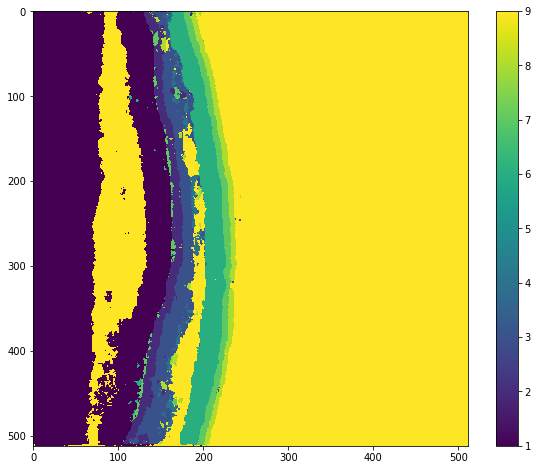

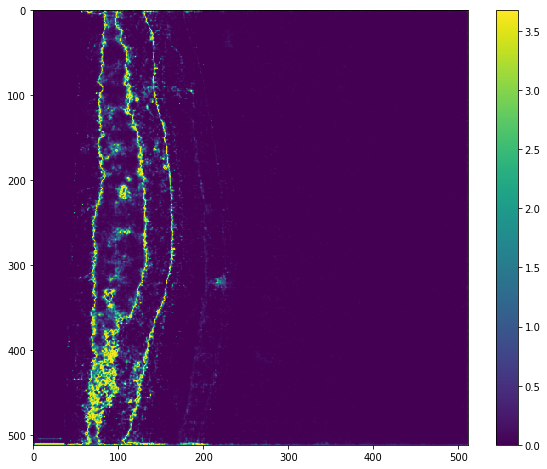

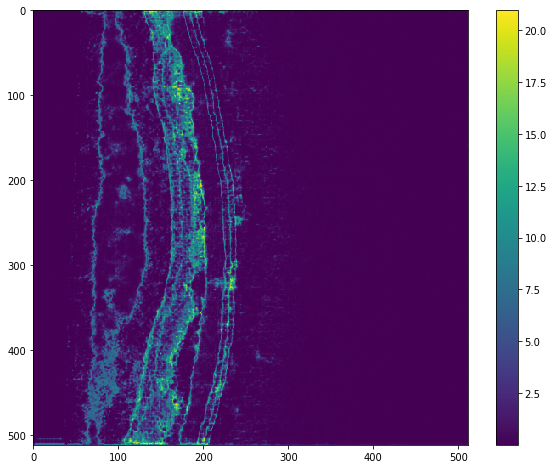

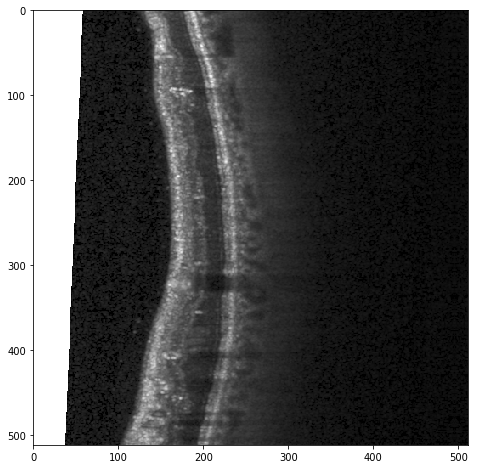

In [77]:
avg, per_class_entropy, overall_entropy = relay_net.predict(Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True))

idx = np.argmax(avg,0)
#idx = np.squeeze(idx==2)
plt.imshow(idx)
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(per_class_entropy)[1])
plt.colorbar()
plt.show()

plt.imshow(np.squeeze(overall_entropy))
plt.colorbar()
plt.show()

img_test = test_data.X[11:12]
img_test = np.squeeze(img_test)
plt.imshow(img_test, cmap='gray')
plt.show()

number of samples: 2


/home/magnus/Documents/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


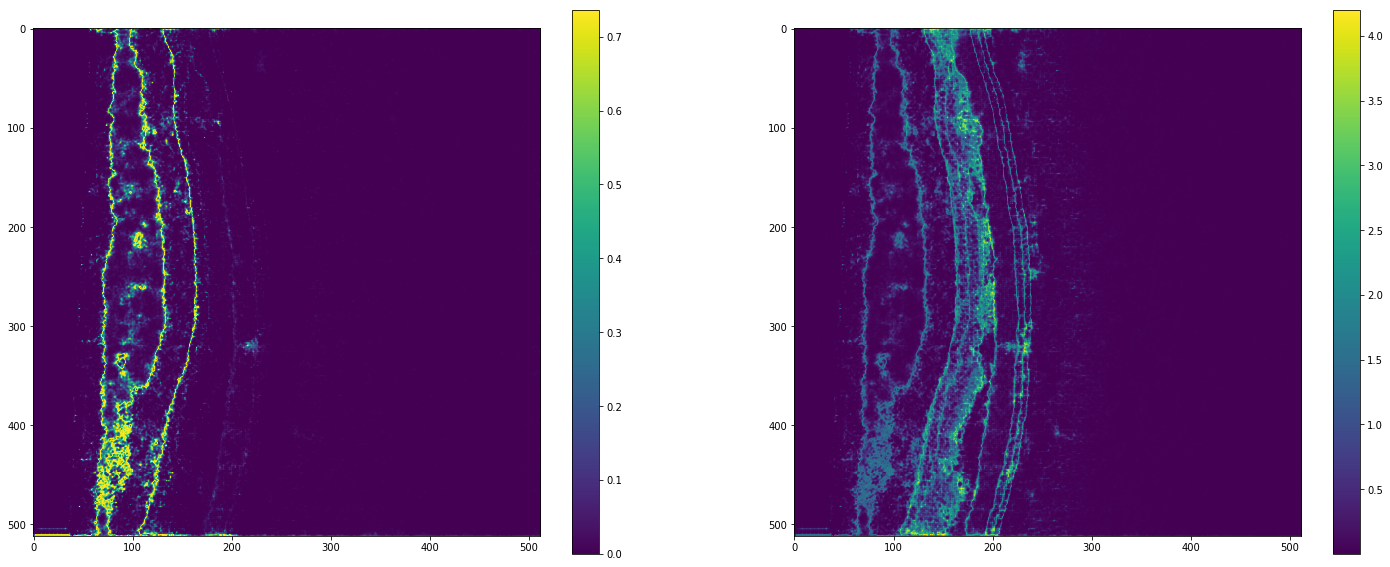

number of samples: 5


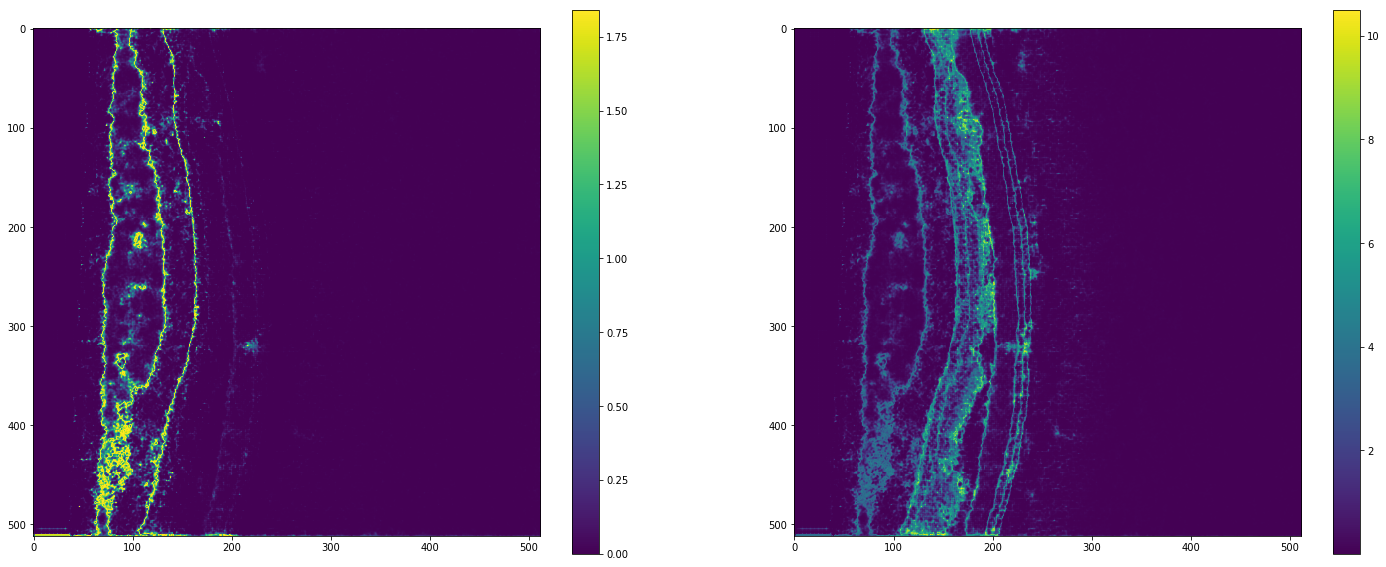

number of samples: 100


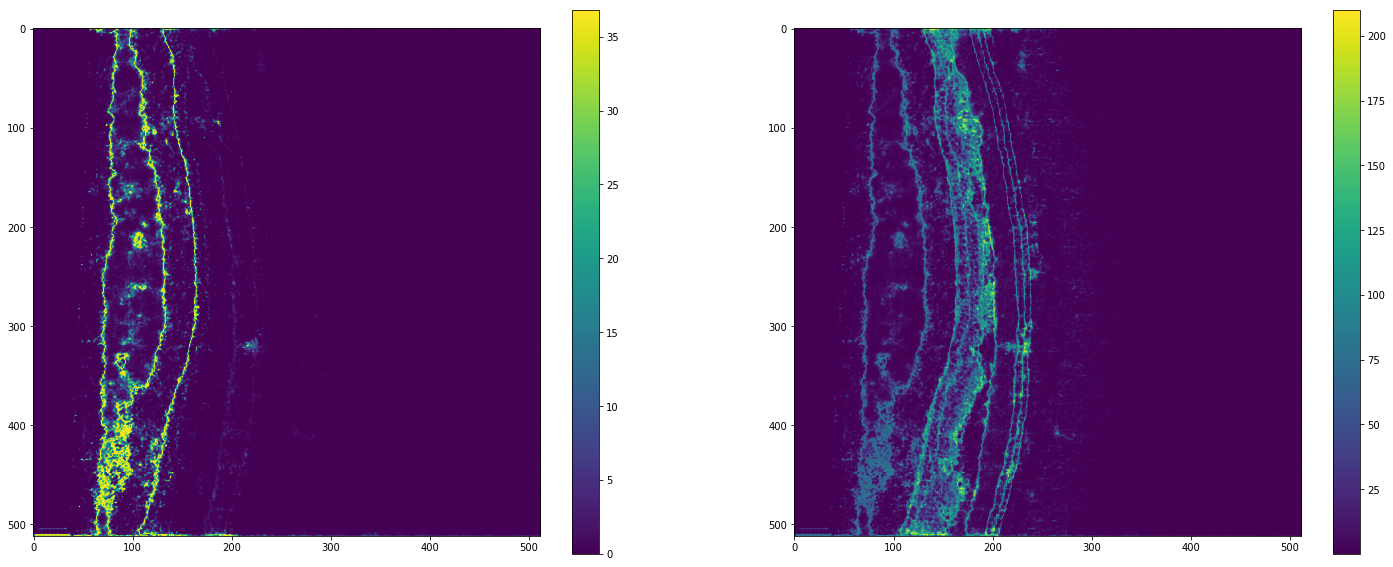

In [92]:

for i in [2, 5, 100]:
    plt.figure(figsize=(25,10))
    print('number of samples: {}'.format(i))
    avg, per_class_entropy, overall_entropy = relay_net.predict(
        Variable(torch.Tensor(test_data.X[11:12]).cuda(),volatile=True), 
        times=i)
    
    plt.subplot(121)
    plt.imshow(np.squeeze(per_class_entropy)[1])
    plt.colorbar()
    
    plt.subplot(122)
    plt.imshow(np.squeeze(overall_entropy))
    plt.colorbar()
    plt.show()